In [2]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import warnings
import pandas as pd
warnings.simplefilter(action='ignore', category=FutureWarning)

In [165]:
df = pd.read_csv('../data/subway_user_year_v1_1.csv', index_col=0)
df = df.loc[df['조사연도'] == 2023]
df

,조사연도,호선명,역명,06시,07시,08시,09시,10시,11시,12시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,2023,1호선,동대문,11190,12877,20197,34191,33805,33944,38914,...,46117,47490,46898,45366,43532,41134,32754,25336,22636,18361
1,2023,1호선,동묘앞,3358,7307,12120,24016,21734,25416,36277,...,54744,58229,56147,48969,37361,25077,14362,9488,9366,8460
2,2023,1호선,서울역,13990,52859,129585,265248,191913,125908,134271,...,154009,133509,161585,176419,236816,288749,165631,150624,114133,76219
3,2023,1호선,시청,5856,22443,67360,192501,92053,47941,54538,...,57486,60602,66873,71422,104950,175739,67952,95058,51872,33430
4,2023,1호선,신설동,9530,15027,36825,77257,47193,34667,34674,...,39523,39307,41188,46266,56647,74450,38427,25804,23758,18700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2023,8호선,신흥,3360,7984,18416,26465,15230,11930,12223,...,15946,16153,17124,19611,21322,26704,20265,7644,11171,9043
274,2023,8호선,암사,14059,29674,80841,118147,61629,38168,36654,...,41183,40633,45056,51258,64066,88799,70196,19854,33420,33216
275,2023,8호선,잠실,3601,12718,35977,88398,53803,40187,45355,...,53022,56270,64187,69529,84050,110436,62178,73952,44832,33155
276,2023,8호선,장지,7529,26496,65372,98371,56608,38343,35700,...,39193,40582,50056,56279,73341,95797,59093,44322,32773,26796


In [206]:
df['sum'] = df.iloc[:,3:21].sum(axis=1)
df['morning'] = df.loc[:,'07시':'09시'].sum(axis=1)
df['evening'] = df.loc[:,'17시':'19시'].sum(axis=1)
df

,조사연도,호선명,역명,06시,07시,08시,09시,10시,11시,12시,...,17시,18시,19시,20시,21시,22시,23시,sum,morning,evening
0,2023,1호선,동대문,11190,12877,20197,34191,33805,33944,38914,...,45366,43532,41134,32754,25336,22636,18361,599784,67265,130032
1,2023,1호선,동묘앞,3358,7307,12120,24016,21734,25416,36277,...,48969,37361,25077,14362,9488,9366,8460,499309,43443,111407
2,2023,1호선,서울역,13990,52859,129585,265248,191913,125908,134271,...,176419,236816,288749,165631,150624,114133,76219,2726849,447692,701984
3,2023,1호선,시청,5856,22443,67360,192501,92053,47941,54538,...,71422,104950,175739,67952,95058,51872,33430,1322353,282304,352111
4,2023,1호선,신설동,9530,15027,36825,77257,47193,34667,34674,...,46266,56647,74450,38427,25804,23758,18700,696447,129109,177363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2023,8호선,신흥,3360,7984,18416,26465,15230,11930,12223,...,19611,21322,26704,20265,7644,11171,9043,274856,52865,67637
274,2023,8호선,암사,14059,29674,80841,118147,61629,38168,36654,...,51258,64066,88799,70196,19854,33420,33216,908044,228662,204123
275,2023,8호선,잠실,3601,12718,35977,88398,53803,40187,45355,...,69529,84050,110436,62178,73952,44832,33155,980122,137093,264015
276,2023,8호선,장지,7529,26496,65372,98371,56608,38343,35700,...,56279,73341,95797,59093,44322,32773,26796,887310,190239,225417


In [ ]:
# df['호선명'] = df['호선명'].str.replace('호선', '')
# df['merge'] = df['호선명'] + df['역명']
# df_1 = df.loc[df['조사연도'] == 2023, ['merge', 'sum']]
# df_1['merge'].value_counts()

merge
8천호      1
1동대문     1
1동묘앞     1
1서울역     1
1시청      1
        ..
2강남      1
1청량리     1
1종로5가    1
1종로3가    1
1종각      1
Name: count, Length: 278, dtype: int64

In [163]:
df_1['sum'].sort_values(ascending=False)

10     4331681
52     4214768
59     3763399
14     3004641
37     2885767
        ...   
202         20
197          4
242          2
222          1
256          1
Name: sum, Length: 278, dtype: int64

/tmp/ipykernel_23900/1347140999.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


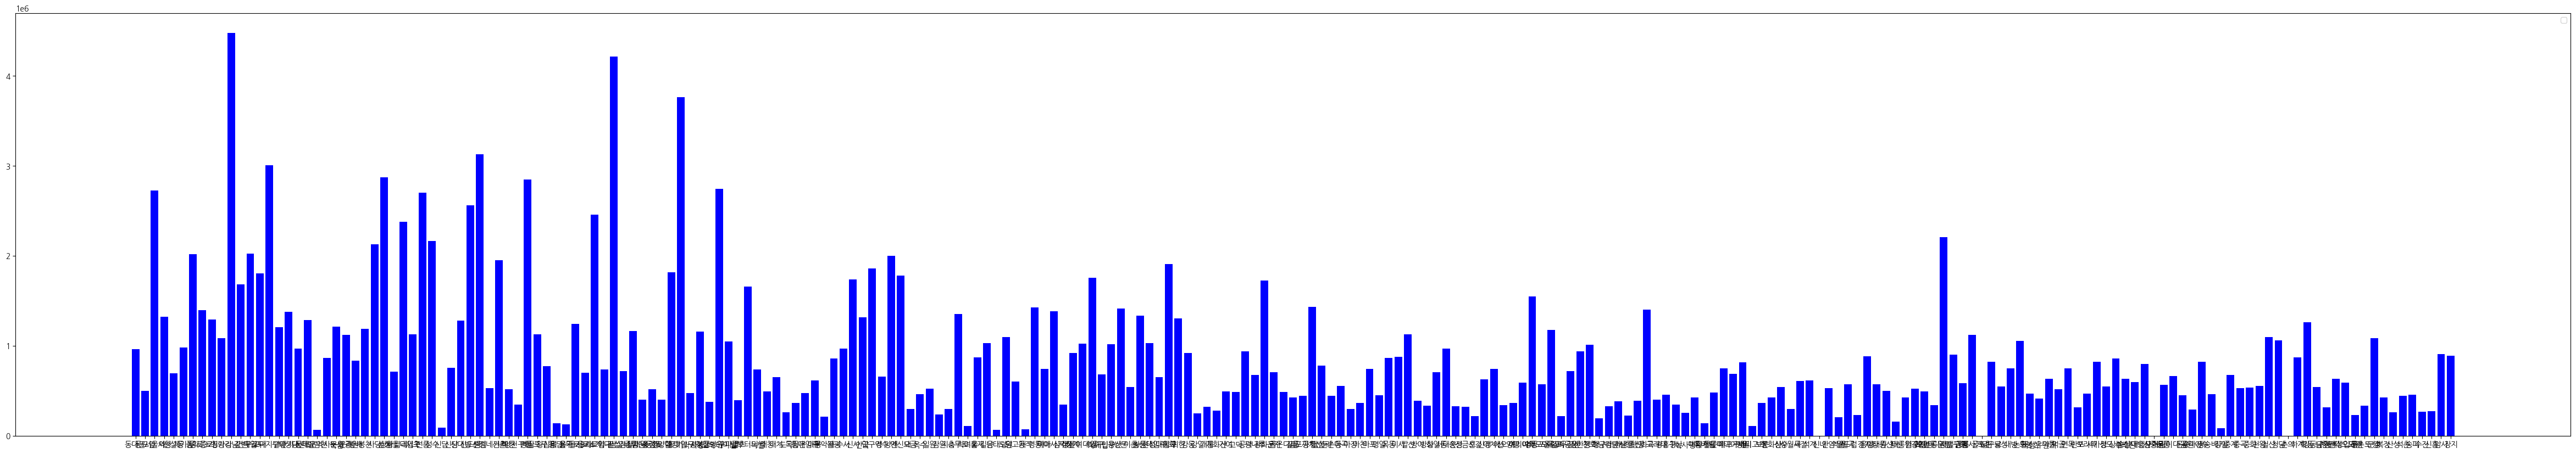

In [ ]:
fig, ax1 = plt.subplots(figsize=(60,10))
# ax1.set_title('사망자 수 대비 등장인물 수 / 투표인원 수', pad=30, fontsize=50)
ax1.bar(df['역명'], df["sum"], ls='solid', lw=3, color='b')
# ax1.grid()
# plt.xticks(rotation=90, size=30)
# plt.yticks(size=30)
# ax1.set_xlabel('에피소드', labelpad=15, size = 50)
# ax1.set_ylabel('값', labelpad=15, size = 50)
# ax1.set_xlim('S1E0', 'S8E6')
ax1.legend()
# ax1.show()

ax2 = ax1.twinx()
ax2.bar(df['역명'], df[], color='deeppink', label='Demand', alpha=0.7, width=0.7)
# ax2.set_ylabel('사망자 수', labelpad=15, size = 50)
# plt.yticks(size=30)
# ax2.tick_params(axis='y', direction='in')
# ax2.legend(['사망자 수'], fontsize=30)

In [196]:
df.loc[df['역명']=='신도림']

,조사연도,호선명,역명,06시,07시,08시,09시,10시,11시,12시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,sum
36,2023,2호선,신도림,33676,64362,161847,239529,142220,112575,112289,...,127282,140106,157993,200514,281565,189438,114814,123918,109264,2562639


In [185]:
(df['역명'].value_counts() == 2).sum()

np.int64(31)

In [207]:
df1 = df.groupby(by='역명').sum().reset_index()
df1
df.loc[df['역명']=='신도림']

,조사연도,호선명,역명,06시,07시,08시,09시,10시,11시,12시,...,17시,18시,19시,20시,21시,22시,23시,sum,morning,evening
36,2023,2호선,신도림,33676,64362,161847,239529,142220,112575,112289,...,157993,200514,281565,189438,114814,123918,109264,2562639,465738,640072


In [208]:
df1 = df1.sort_values(by='sum', ascending=False)
df1 = df1.reset_index(drop=True)
df1.head(30)[['역명', '호선명', 'sum']]
df1.to_csv('sort_sum.csv')
df1

,역명,조사연도,호선명,06시,07시,08시,09시,10시,11시,12시,...,17시,18시,19시,20시,21시,22시,23시,sum,morning,evening
0,잠실,4046,2호선8호선,19576,83632,214604,405802,322711,228206,237927,...,351233,435753,559622,365864,397234,267171,205280,5194890,704038,1346608
1,강남,2023,2호선,20720,65990,171696,333966,351250,195603,167947,...,263986,366336,480236,311655,315962,225747,212947,4331681,571652,1110558
2,홍대입구,2023,2호선,32670,46081,90091,167591,161088,130335,161485,...,277928,333608,396547,303640,296984,243635,231807,3763399,303763,1008083
3,고속터미널,4046,3호선7호선,12324,59810,110780,175861,197076,191391,218774,...,284411,317358,316787,229746,309180,149931,99818,3657799,346451,918556
4,서울역,4046,1호선4호선,18631,71386,176740,356840,251016,162948,171807,...,228218,315978,384094,217816,179656,144987,100095,3558269,604966,928290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,남태령,2023,4호선,512,1910,5702,8719,4173,3147,3075,...,4243,6727,5685,2960,1916,1830,1064,64213,16331,16655
239,신내,2023,6호선,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,4,0,1
240,신중동,2023,7호선,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2,0,1
241,굴포천,2023,7호선,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [210]:
df1.head(30)[['역명', 'sum', 'morning',	'evening']]

,역명,sum,morning,evening
0,잠실,5194890,704038,1346608
1,강남,4331681,571652,1110558
2,홍대입구,3763399,303763,1008083
3,고속터미널,3657799,346451,918556
4,서울역,3558269,604966,928290
5,사당,3433269,540275,886495
6,구로디지털단지,3004641,669304,743515
7,신림,2885767,571307,659078
8,삼성,2871467,516631,769783
9,역삼,2851275,567529,719639
